## Pandas

In [47]:
import pandas as pd

In [48]:
pd.Series([6,2,3])

0    6
1    2
2    3
dtype: int64

In [49]:
pd.Series(data=[6,2,3] , index=['abc','def','ghi'])

abc    6
def    2
ghi    3
dtype: int64

In [50]:
a = pd.Series(data=[6,2,3],index=['abc','def','ghi'])
a['abc']

6

In [51]:
pd.Series([6,2,3],['abc','def','ghi'])

abc    6
def    2
ghi    3
dtype: int64

In [52]:
pd.Series(np.array([6,2,3]),['abc','def','ghi'])

abc    6
def    2
ghi    3
dtype: int32

In [53]:
dict = {'abc':6,'def':2,'ghi':3}
dict

{'abc': 6, 'def': 2, 'ghi': 3}

In [54]:
pd.Series(dict)

abc    6
def    2
ghi    3
dtype: int64

In [55]:
b = pd.Series([sum,min,max])
b

0    <built-in function sum>
1    <built-in function min>
2    <built-in function max>
dtype: object

In [56]:
b[0](a)

11

In [57]:
b[1](a)

2

In [58]:
b[2](a)

6

In [59]:
a = {'a':5,'b':3,'c':10,'d':20}
b = {'a':2,'b':3,'c':10}
pd.Series(a)+pd.Series(b)

a     7.0
b     6.0
c    20.0
d     NaN
dtype: float64

## Dataframe

In [60]:
pd.DataFrame(data=[[1,2,3],[4,5,6],[7,8,9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [61]:
a = pd.DataFrame(data=[[1,2,3],[4,5,6],[7,8,9]],index=['x1','x2','x3'],columns=['y1','y2','y3'])

In [62]:
a.y1

x1    1
x2    4
x3    7
Name: y1, dtype: int64

In [63]:
a.loc[['x1','x3'],['y1','y3']]

,y1,y3
x1,1,3
x3,7,9


In [64]:
a.iloc[[0,1],[0,1]]

,y1,y2
x1,1,2
x2,4,5


In [65]:
a.sum=a.y1+a.y2+a.y3
a

,y1,y2,y3
x1,1,2,3
x2,4,5,6
x3,7,8,9


In [66]:
a.drop('y3',axis=1)

,y1,y2
x1,1,2
x2,4,5
x3,7,8


In [67]:
a.drop('x2',axis=0)

,y1,y2,y3
x1,1,2,3
x3,7,8,9


In [68]:
a>5

,y1,y2,y3
x1,False,False,False
x2,False,False,True
x3,True,True,True


In [69]:
a[a>5]

,y1,y2,y3
x1,NaN,NaN,NaN
x2,NaN,NaN,6.0
x3,7.0,8.0,9.0


In [70]:
a[a.y2>5]

,y1,y2,y3
x3,7,8,9


In [71]:
a[(a.y2>2) & (a.y1<5) ]

,y1,y2,y3
x2,4,5,6


In [72]:
a.reset_index()

,index,y1,y2,y3
0,x1,1,2,3
1,x2,4,5,6
2,x3,7,8,9


## Multi index

In [73]:
first = [1,1,1,1,2,2,2,2]
second = [1,1,2,2,1,1,2,2]
third = [1,2,1,2,1,2,1,2]
ind = list(zip(first,second,third))
ind = pd.MultiIndex.from_tuples(ind)
ind

MultiIndex([(1, 1, 1),
            (1, 1, 2),
            (1, 2, 1),
            (1, 2, 2),
            (2, 1, 1),
            (2, 1, 2),
            (2, 2, 1),
            (2, 2, 2)],
           )

In [74]:
a = pd.DataFrame(np.random.rand(8,3),index=ind,columns=['x1','x2','x3'])
a

x1        x2        x3
1 1 1  0.813874  0.066074  0.513921
    2  0.910408  0.428567  0.211833
  2 1  0.984272  0.386174  0.506967
    2  0.908479  0.767105  0.929230
2 1 1  0.891599  0.843880  0.621363
    2  0.796196  0.691489  0.406042
  2 1  0.375045  0.410474  0.883274
    2  0.408109  0.024323  0.770454

In [75]:
a.loc[1]

x1        x2        x3
1 1  0.813874  0.066074  0.513921
  2  0.910408  0.428567  0.211833
2 1  0.984272  0.386174  0.506967
  2  0.908479  0.767105  0.929230

In [76]:
a.loc[1].loc[2]

,x1,x2,x3
1,0.984272,0.386174,0.506967
2,0.908479,0.767105,0.929230


In [77]:
a.loc[1].loc[2].loc[1]

x1    0.984272
x2    0.386174
x3    0.506967
Name: 1, dtype: float64

In [78]:
a.index.names = ['first','second','third']
a

x1        x2        x3
first second third                              
1     1      1      0.813874  0.066074  0.513921
             2      0.910408  0.428567  0.211833
      2      1      0.984272  0.386174  0.506967
             2      0.908479  0.767105  0.929230
2     1      1      0.891599  0.843880  0.621363
             2      0.796196  0.691489  0.406042
      2      1      0.375045  0.410474  0.883274
             2      0.408109  0.024323  0.770454

## Cleaning of Data

In [79]:
a = pd.DataFrame(np.random.randn(5,5),'x1 x2 x3 x4 x5'.split(),'y1 y2 y3 y4 y5'.split())
a

,y1,y2,y3,y4,y5
x1,0.846758,-0.418751,0.294835,-0.481363,0.249085
x2,-1.196720,-0.924582,-0.213666,0.055099,1.500621
x3,-0.425673,-0.828747,2.480696,-2.818908,0.193283
x4,-0.226006,-1.365449,0.264784,1.078997,1.401943
x5,2.204940,0.190610,1.125488,-0.198925,0.412942


In [80]:
c = a[a>-1]
c

,y1,y2,y3,y4,y5
x1,0.846758,-0.418751,0.294835,-0.481363,0.249085
x2,NaN,-0.924582,-0.213666,0.055099,1.500621
x3,-0.425673,-0.828747,2.480696,NaN,0.193283
x4,-0.226006,NaN,0.264784,1.078997,1.401943
x5,2.204940,0.190610,1.125488,-0.198925,0.412942


In [81]:
c.dropna()

,y1,y2,y3,y4,y5
x1,0.846758,-0.418751,0.294835,-0.481363,0.249085
x5,2.204940,0.190610,1.125488,-0.198925,0.412942


In [83]:
b = pd.DataFrame(np.random.randn(5,5),'x1 x2 x3 x4 x5'.split(),'y1 y2 y3 y4 y5'.split())
b

,y1,y2,y3,y4,y5
x1,-0.177665,-1.253200,0.770909,-0.082796,-1.052372
x2,-1.381359,0.717590,0.550939,0.107188,-0.003197
x3,-0.075423,-0.363924,1.875665,-0.481090,0.368809
x4,0.062660,-0.518993,-2.288847,-1.384199,-0.220770
x5,0.930300,-0.795511,-1.079821,-0.803262,-0.856974


## Matplotlib

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
x = np.linspace(0,15,100)
y = np.sin(x)

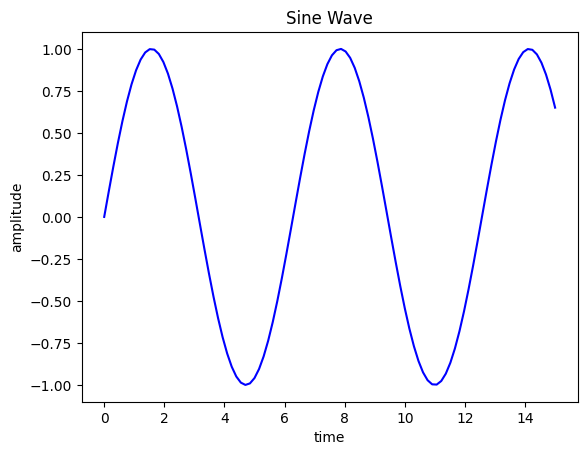

In [21]:
plt.plot(x,y,'b')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Sine Wave')
plt.show()

In [22]:
z = np.cos(x)

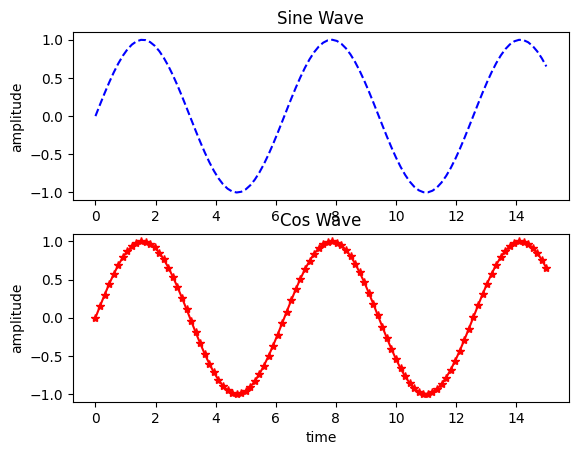

In [23]:
plt.subplot(2,1,1)
plt.plot(x,y,'--b')
plt.ylabel('amplitude')
plt.title('Sine Wave')
plt.subplot(2,1,2)
plt.plot(x,y,'-*r')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Cos Wave')
plt.show()

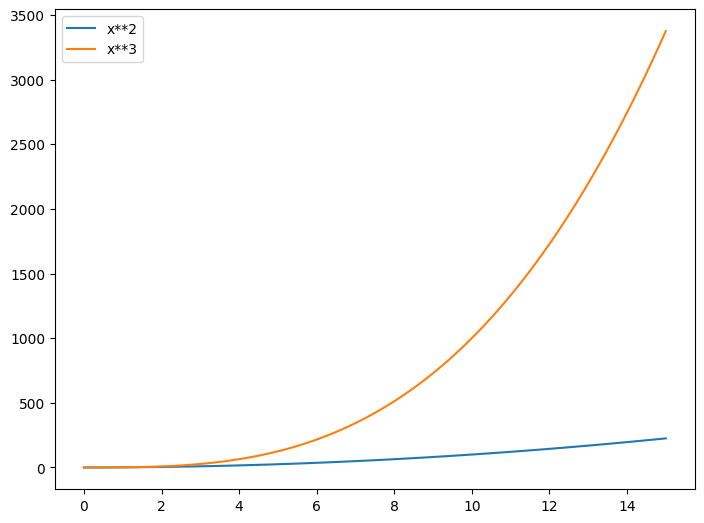

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

(array([  2.,  13.,  71., 149., 222., 262., 176.,  75.,  23.,   7.]),
 array([-3.5028011 , -2.82391833, -2.14503556, -1.46615279, -0.78727001,
        -0.10838724,  0.57049553,  1.2493783 ,  1.92826108,  2.60714385,
         3.28602662]),
 <BarContainer object of 10 artists>)

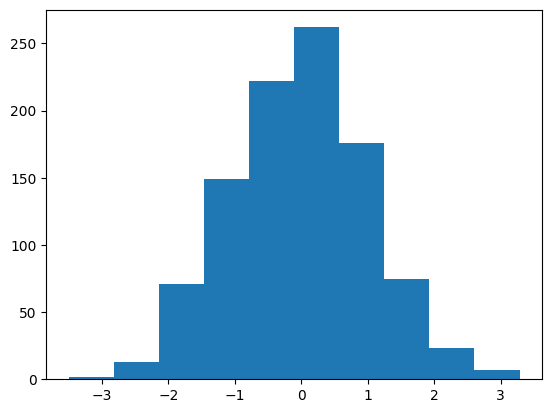

In [25]:
data = np.random.normal(0, 1, 1000)
plt.hist(data)

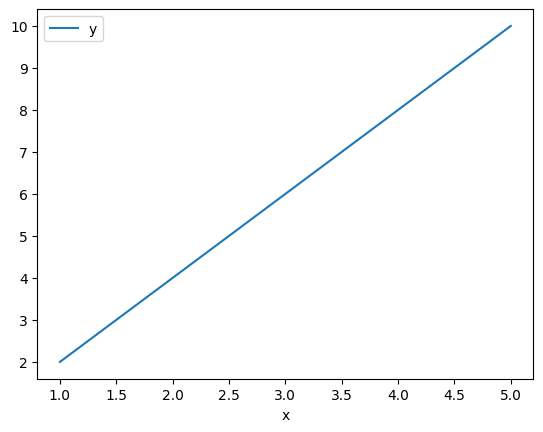

In [26]:
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}
df = pd.DataFrame(data)
# Plotting a line plot
df.plot(x='x', y='y')
plt.show()

## Seaborn

In [27]:
 import seaborn as sns

In [29]:
tips = sns.load_dataset("tips")

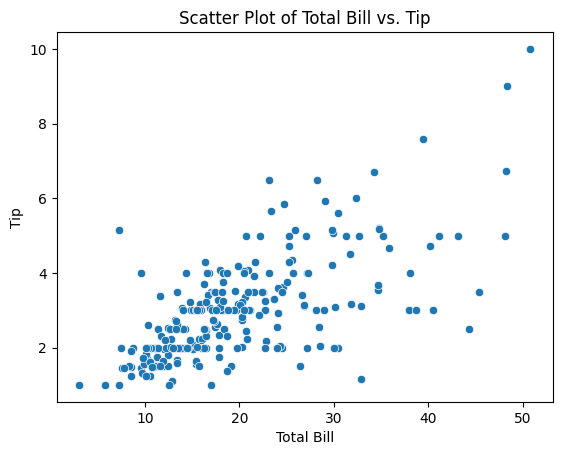

In [31]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.show()

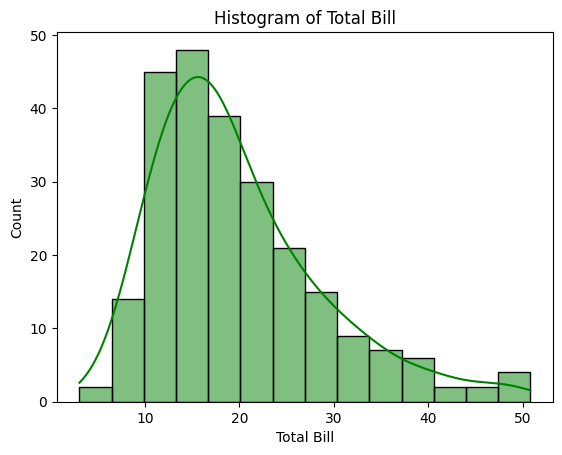

In [96]:
# Creating a histogram
sns.histplot(tips["total_bill"], kde=True, color="green")
plt.xlabel("Total Bill")
plt.title("Histogram of Total Bill")
plt.show()

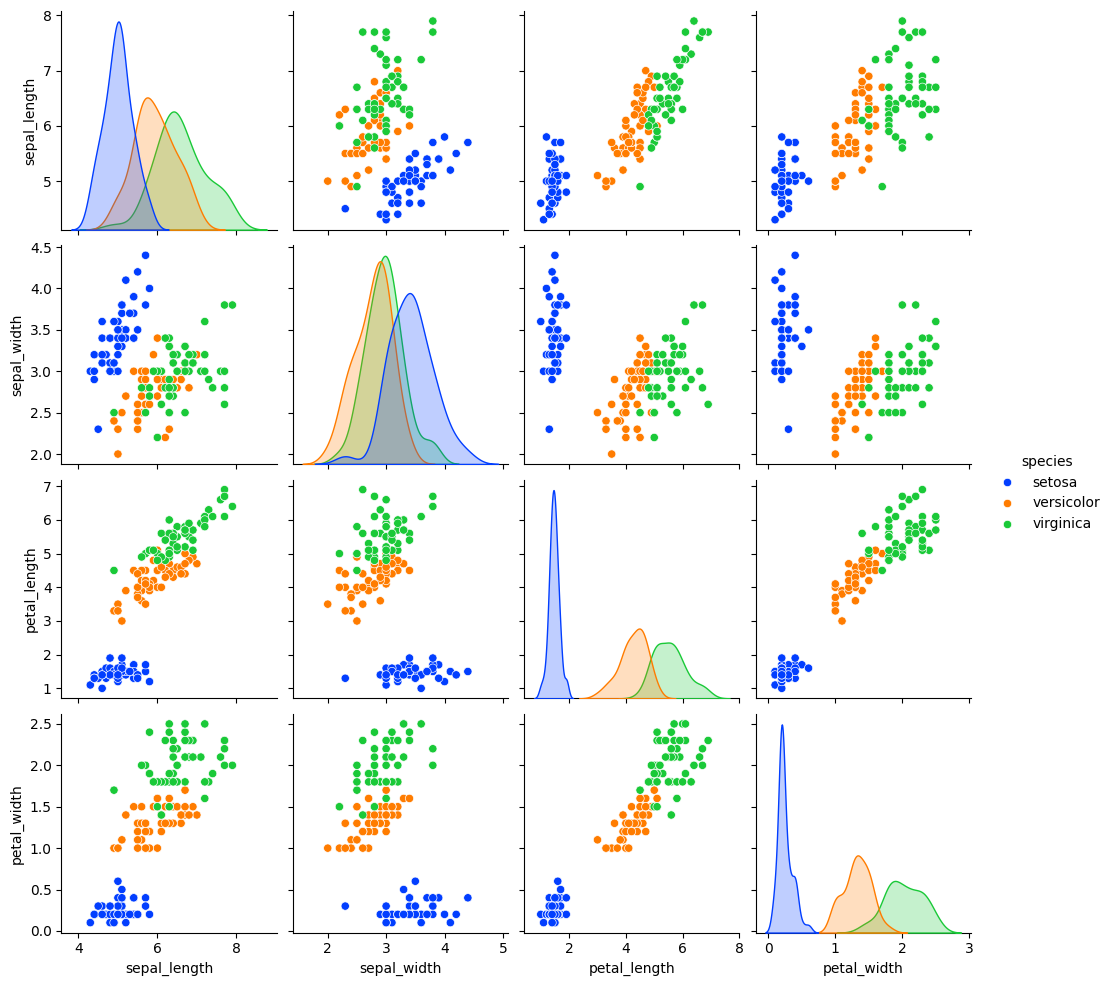

In [97]:
iris = sns.load_dataset("iris")

# Creating a pair plot
sns.pairplot(iris, hue="species", palette="bright")
plt.show()

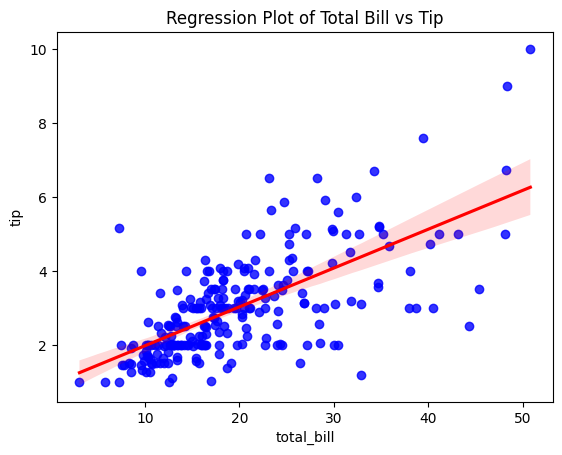

In [100]:
# Creating a regression plot
sns.regplot(x="total_bill", y="tip", data=tips, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Regression Plot of Total Bill vs Tip")
plt.show()